###  Setting

In [1]:
MOUNT_PATH = "/run/user/1000/gvfs/smb-share:server=azlab-fs01,share=東研究室/個人work/富井/"

In [2]:
DATA_PATH = MOUNT_PATH + "PYUSCT_train/dataset008/full_visual/"
MODEL_PATH = MOUNT_PATH + "PYUSCT_train/dataset008/"
model_name = "clf_GPC_rbf_iso"

In [3]:
%ls $MODEL_PATH

clf_GPC_rbf_iso.pkl*  input/       sa/            X_pca_sample10000.npy*
dataset.npz*          list.csv*    sa.npy*        Y_pca_sample10000.npy*
full_visual/          output/      sa_small.npy*
image/                param.json*  sa_small.png*


### Load model

In [ ]:
from sklearn.externals import joblib

In [ ]:
model_clf= joblib.load(MODEL_PATH + model_name + ".pkl")

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [ ]:
model_clf

### Load data

In [ ]:
import numpy as np
from os import listdir
from os.path import isfile, join

In [ ]:
files = [f for f in listdir(DATA_PATH) if isfile(join(DATA_PATH, f))]
files.sort()

In [ ]:
join(DATA_PATH, files[0])

In [ ]:
import time

In [ ]:
time.ctime()

In [ ]:
batch = 1024 * 16
count = 0
data = np.zeros(1024*1024)
data_proba = np.zeros((1024*1024,2))
for f in files:
    print("{} : turn{} start.".format(time.ctime(), count))
    tmp = np.load(join(DATA_PATH, f))
    data[count*batch:(count+1)*batch] = model_clf.predict(tmp)
    data_proba[count*batch:(count+1)*batch] = model_clf.predict_proba(tmp)
    print("{} : turn{} finished.".format(time.ctime(), count))
    print()
    count += 1
    

In [ ]:
count

In [ ]:
data.shape

In [ ]:
data_visual = data.reshape((1024,1024))
data_proba_visual = data_proba[:,1].reshape((1024, 1024))

In [ ]:
data_visual.shape

In [ ]:
data_proba_visual.shape

### Load saved data

In [4]:
import numpy as np

In [5]:
data_visual = np.load(DATA_PATH + "res_data_01_visual.npy")[256:768,256:768]
data_proba_visual = np.load(DATA_PATH + "res_data_proba_visual.npy")[256:768,256:768]

In [6]:
data_visual.shape

(512, 512)

### Show image

In [7]:
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt

% matplotlib inline

# mpl.style.use('classic')

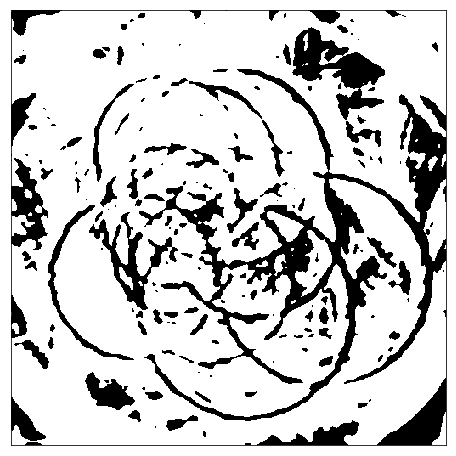

In [8]:
plt.figure(figsize=(8, 8))
# plt.suptitle(title, size=16)
plt.imshow(data_visual, 
            cmap=plt.cm.Greys,
            #vmin=-vmax, vmax=vmax
          )
plt.xticks([])
plt.yticks([])
plt.show()

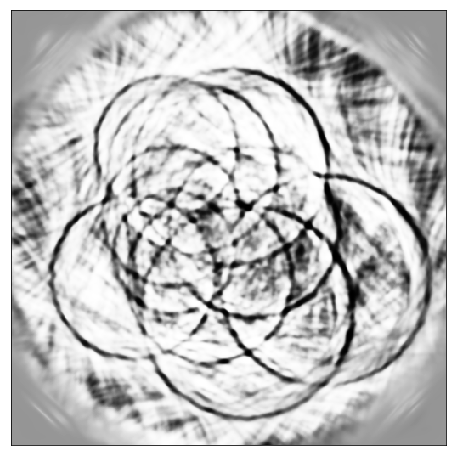

In [9]:
plt.figure(figsize=(8, 8))
# plt.suptitle(title, size=16)
plt.imshow(data_proba_visual, 
            cmap=plt.cm.Greys,
            #vmin=-vmax, vmax=vmax
          )
plt.xticks([])
plt.yticks([])
plt.show()

In [15]:
%cd ~/Documents

import matplotlib.image as mpimg

/home/yuhui/Documents


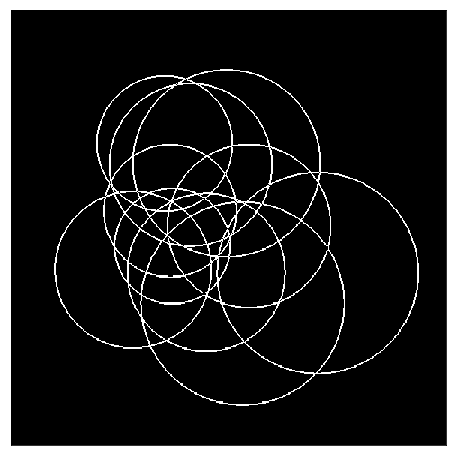

In [16]:
plt.figure(figsize=(8, 8))
img=mpimg.imread('edge.png')
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()